# Model-1

In [1]:
import tensorflow as tf
import numpy as np
from dataset import Dataset, load_datasets
from config import get_dataset_path
from layers import *
from networks import *
from model import Model
from dbase import build_dbase
from evaluation import print_accuracy, plot_search_results

In [2]:
tr_data_path  = get_dataset_path("train/5557_300_128_128_1_uint8_aug1.npy")
va_data_path  = get_dataset_path("valid/550_300_128_128_1_uint8_aug1.npy")
model_path    = "models/001-v1/"

## Dataset

In [3]:
%%time
tr_dataset, va_dataset = load_datasets(tr_data_path, va_data_path)
print('-'*50)

/netforge/datasets/private/roman/coins/2017-11-29/datasets/train/5557_300_128_128_1_uint8_aug1.npy:
 [5557, 300, 128, 128, 1] uint8
/netforge/datasets/private/roman/coins/2017-11-29/datasets/valid/550_300_128_128_1_uint8_aug1.npy:
 [550, 300, 128, 128, 1] uint8
--------------------------------------------------
CPU times: user 716 ms, sys: 1min 21s, total: 1min 22s
Wall time: 3min 8s


## Build 

In [4]:
%%time
out_dims       = 150
margin         = .5
network        = simple_conv

# aug1, v1: d=150 m=5 s=200k lr=1e-4 tr_acc=92.2% va_acc=97%

acc_batch_size = 300
image_shape    = list(tr_dataset.data.shape[-3:])
model          = Model(image_shape, out_dims, acc_batch_size)
model.build(network)

CPU times: user 4.91 s, sys: 0 ns, total: 4.91 s
Wall time: 5.07 s


## Train

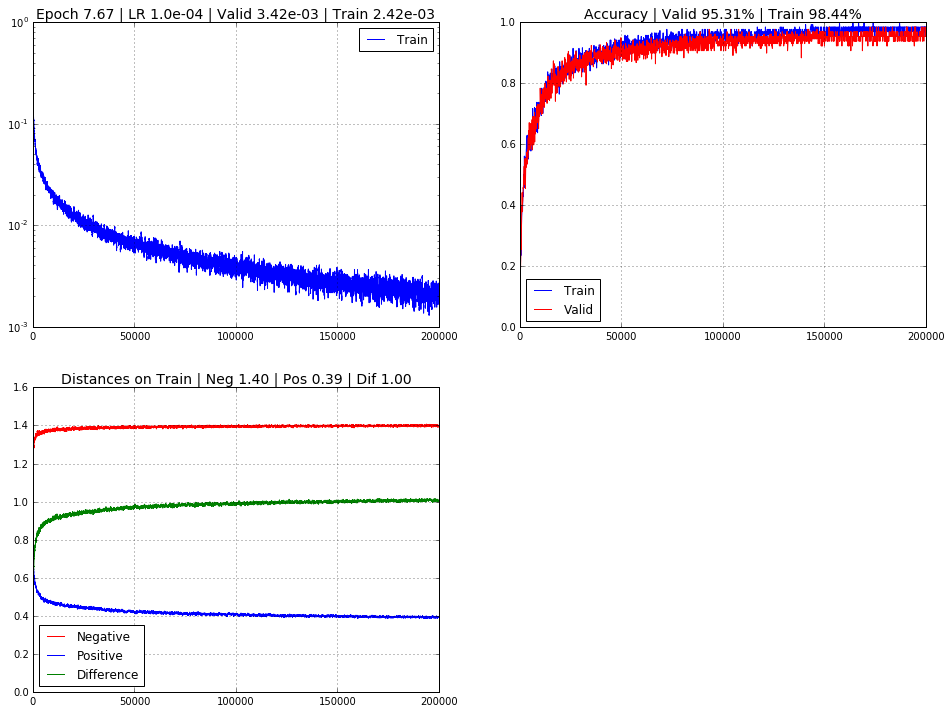

--------------------------------------------------
CPU times: user 2h 41min 54s, sys: 22min 31s, total: 3h 4min 26s
Wall time: 2h 54min 21s


In [71]:
%%time
model.train(
    step_num   = 200000, 
    batch_size = 64,
    lr         = 1e-4, 
    log_every  = 100,
    tr_dataset = tr_dataset,
    va_dataset = va_dataset,
    margin     = margin,
    log_scale  = True)

model.save(model_path)
print('-'*50)

## Database

In [105]:
%%time
ethalons  = va_dataset.get_ethalons()  # tr_dataset va_dataset
augmented = va_dataset.get_augmented() # get_augmented() get_ethalons()

dbase     = build_dbase(model, ethalons, augmented)
print('-'*50)

Ethalons : [550, 128, 128, 1] float32
Augmented: [550, 128, 128, 1] float32
Database : [550, 150] float64
--------------------------------------------------
CPU times: user 156 ms, sys: 136 ms, total: 292 ms
Wall time: 269 ms


## Accuracy

In [106]:
%%time
print_accuracy(dbase, augmented, 5)

Database   : [550, 150]
Request    : [550, 128, 128, 1]
Performance: 3008 img/sec
--------------------------------------------------
Accuracy@1: 96.2%
Accuracy@2: 98.5%
Accuracy@3: 98.7%
Accuracy@4: 98.9%
Accuracy@5: 99.1%
--------------------------------------------------
CPU times: user 192 ms, sys: 12 ms, total: 204 ms
Wall time: 189 ms


## Search

Database   : [5557, 150]
Request    : [500, 128, 128, 1]

Min distance: 0.00
Max distance: 0.88
Ave distance: 0.68


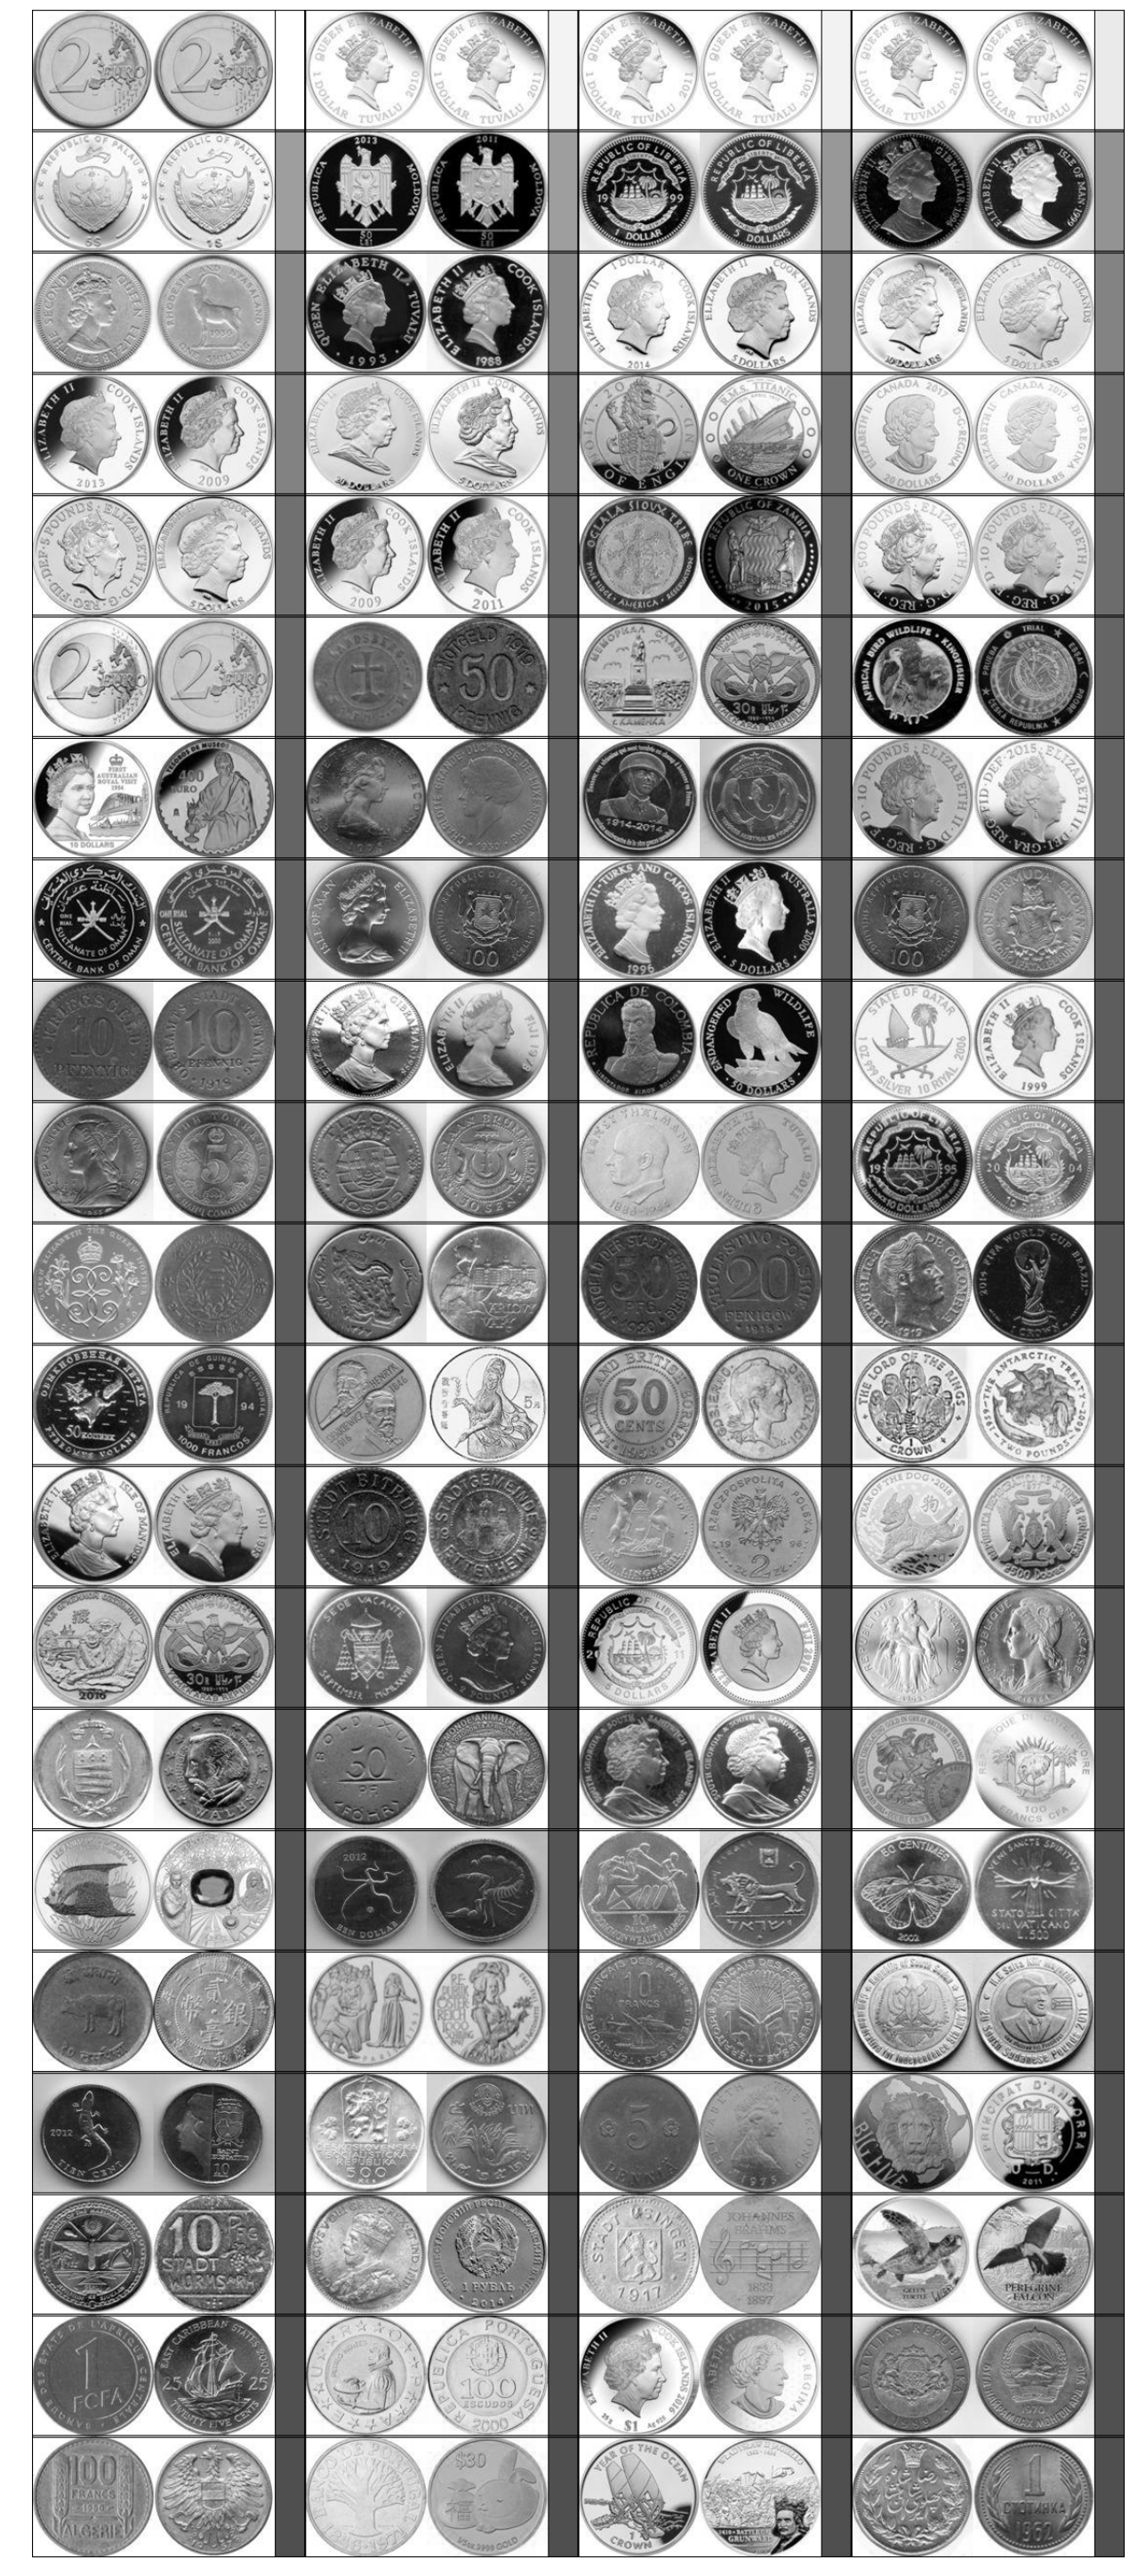

CPU times: user 4.99 s, sys: 2.65 s, total: 7.64 s
Wall time: 7.41 s


In [73]:
%%time
plot_search_results(dbase, tr_dataset.get_ethalons(), num=500, cols=4, k=4, sort='asc', plot_limit=84)
#plot_search_results(dbase, augmented, num=550, cols=4, k=0, sort='desc', plot_limit=42)

## Restore

In [6]:
%time
model.restore(model_path)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.1 µs
INFO:tensorflow:Restoring parameters from models/003-v5/
